## Data Loading:

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore a specific warning (e.g., a FutureWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
# Reset warnings to their default behavior
warnings.filterwarnings('default')
# Ignore all warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**You can DOWNLOAD this dataset on this link ->** [Toronto Police Service](https://data.torontopolice.on.ca/datasets/TorontoPS::major-crime-indicators-open-data/about).

### Data Sampling:

In [2]:
dataset=pd.read_csv('/kaggle/input/major-crime-indicators-open-data/Major_Crime_Indicators_Open_Data.csv')
# DOWNLOAD LINK:
#    https://data.torontopolice.on.ca/datasets/TorontoPS::major-crime-indicators-open-data/about
#please read license from the link before using it
# keeping original data in dataset and coping data in dataframe data
data=dataset[:]
data.sample(n=3)

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
129748,-79.514755,43.609206,129749,GO-20173015510,2017/11/17 05:00:00+00,2017/11/17 05:00:00+00,2017,November,17,321,...,1430,100,Assault,Assault,160,Mimico-Queensway,17,Mimico (includes Humber Bay Shores) (17),-79.514755,43.609206
240788,-79.376369,43.652253,240789,GO-20202024296,2020/10/25 04:00:00+00,2020/10/16 04:00:00+00,2020,October,25,299,...,2132,200,Theft From Motor Vehicle Over,Theft Over,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.376369,43.652253
103860,-79.314146,43.787421,103861,GO-2017359177,2017/02/26 05:00:00+00,2017/02/25 05:00:00+00,2017,February,26,57,...,2120,200,B&E,Break and Enter,147,L'Amoreaux West,117,L'Amoreaux (117),-79.314146,43.787421


## Data Cleaning:

Information about DataFrame:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323296 entries, 0 to 323295
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  323296 non-null  float64
 1   Y                  323296 non-null  float64
 2   OBJECTID           323296 non-null  int64  
 3   EVENT_UNIQUE_ID    323296 non-null  object 
 4   REPORT_DATE        323296 non-null  object 
 5   OCC_DATE           323296 non-null  object 
 6   REPORT_YEAR        323296 non-null  int64  
 7   REPORT_MONTH       323296 non-null  object 
 8   REPORT_DAY         323296 non-null  int64  
 9   REPORT_DOY         323296 non-null  int64  
 10  REPORT_DOW         323296 non-null  object 
 11  REPORT_HOUR        323296 non-null  int64  
 12  OCC_YEAR           323191 non-null  float64
 13  OCC_MONTH          323191 non-null  object 
 14  OCC_DAY            323191 non-null  float64
 15  OCC_DOY            323191 non-null  float64
 16  OC

In [4]:
# changing character values into integer in a column that has integer type data 
data['HOOD_158'] = pd.to_numeric(data['HOOD_158'], errors='coerce')
# changing datatypes from float to int
data['OCC_YEAR']=pd.to_numeric(data['OCC_YEAR'], errors='coerce')
data['OCC_DAY']=pd.to_numeric(data['OCC_DAY'], errors='coerce')
data['HOOD_158']=pd.to_numeric(data['HOOD_158'], errors='coerce')

### Data Filtering:

In [5]:
# dropping columns we dont need for our analysis
data = data.drop(['X', 'Y','OBJECTID','EVENT_UNIQUE_ID','REPORT_DOY','OCC_DOY','UCR_CODE',
       'UCR_EXT', 'HOOD_140', 'NEIGHBOURHOOD_140','OCC_DATE','LOCATION_TYPE'],axis=1)

### Data Duplication:

Finding Duplicate Records:

In [6]:
# finding the total duplicates rows
data.duplicated().sum()

24207

- Total duplicates data : 24207 
- We will remove the 24207 duplicated data from our dataframe.

Size of Dataframe after Removing the duplicates records:

In [7]:
# removing the duplicates rows
data = data.drop_duplicates()
data.shape[0]

299089

### Data Imputation:

Calculating the Percentage of missing data in each Column.

In [8]:
# finding the % of missing data on each column
(data.isna().sum()/len(data))*100

REPORT_DATE          0.000000
REPORT_YEAR          0.000000
REPORT_MONTH         0.000000
REPORT_DAY           0.000000
REPORT_DOW           0.000000
REPORT_HOUR          0.000000
OCC_YEAR             0.031429
OCC_MONTH            0.031429
OCC_DAY              0.031429
OCC_DOW              0.031429
OCC_HOUR             0.000000
DIVISION             0.000000
PREMISES_TYPE        0.000000
OFFENCE              0.000000
MCI_CATEGORY         0.000000
HOOD_158             1.618582
NEIGHBOURHOOD_158    0.000000
LONG_WGS84           0.000000
LAT_WGS84            0.000000
dtype: float64

Finding Columns that has missing values less than **threshold values(5 % of total value)**

In [9]:
# finding columns which contain empty values less than threshold value (5%)
threshold=len(data)*0.05
cols_drop=data.columns[ (data.isna().sum()>0 ) & (data.isna().sum()<=threshold)]
cols_drop

Index(['OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOW', 'HOOD_158'], dtype='object')

- Column 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOW', 'HOOD_158' has missing values which are less than the threshold value(5% of total value). So instead of filling these missing value, we will drop these records.

In [10]:
# removig the rows with NaN value if they are less than 5 %
data=data.dropna(subset=cols_drop)

Size of Dataframe after Removing the NaN values:

In [11]:
# total records after dropping duplicates and NaN values
data.shape[0]

294165

294165 : Final records in our datset after cleaning the dataset.

In [12]:
# again checking for Nan values
data.isna().sum()

REPORT_DATE          0
REPORT_YEAR          0
REPORT_MONTH         0
REPORT_DAY           0
REPORT_DOW           0
REPORT_HOUR          0
OCC_YEAR             0
OCC_MONTH            0
OCC_DAY              0
OCC_DOW              0
OCC_HOUR             0
DIVISION             0
PREMISES_TYPE        0
OFFENCE              0
MCI_CATEGORY         0
HOOD_158             0
NEIGHBOURHOOD_158    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64

- Now in all the columns there are no duplicates value and missing values. Hence we can proceed the data analysis.

## Feature Engineering:

Deriving New Columns - Season : **Spring, Summer, Fall, Winter**

In [13]:
# Define the conditions for each season
months = [
    (data['OCC_MONTH'].isin(['March','April','May'])),  # Spring (March to May)
    (data['OCC_MONTH'].isin(['June','July','August'])),  # Summer (June to August)
    (data['OCC_MONTH'].isin(['September','October','November'])),  # Fall (September to November)
    (data['OCC_MONTH'].isin(['December','January','February']))  # Winter (December to February)
]

# Define the corresponding season labels
season_type = ['Spring', 'Summer', 'Fall', 'Winter']

# Create a new 'season' column based on the conditions
data["season"] = np.select(months, season_type, default="Other")
data.groupby("season").sample(1)

,REPORT_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,DIVISION,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,season
312000,2022/09/30 04:00:00+00,2022,September,30,Friday,19,2022.0,September,30.0,Friday,4,D33,Outside,Theft Of Motor Vehicle,Auto Theft,42.0,Banbury-Don Mills,-79.326905,43.723973,Fall
148533,2018/05/27 04:00:00+00,2018,May,27,Sunday,21,2018.0,May,27.0,Sunday,21,D23,Outside,Robbery - Delivery Person,Robbery,1.0,West Humber-Clairville,-79.595495,43.737508,Spring
154571,2018/07/25 04:00:00+00,2018,July,25,Wednesday,18,2018.0,July,23.0,Monday,12,D43,Other,Assault With Weapon,Assault,136.0,West Hill,-79.179568,43.764799,Summer
281592,2021/12/30 05:00:00+00,2021,December,30,Thursday,11,2021.0,December,29.0,Wednesday,15,D32,House,Theft Of Motor Vehicle,Auto Theft,38.0,Lansing-Westgate,-79.433453,43.744910,Winter


Deriving New Column - **Parts of Day : Morning, Afternoon, Evening, Night**

In [14]:
# Define the conditions for each part of the day
day_parts = [
    (data['OCC_HOUR'].between(6, 11,inclusive='both')),       # Morning (6:00 AM - 11:59 AM)
    (data['OCC_HOUR'].between(12, 16,inclusive='both')),      # Afternoon (12:00 PM - 4:59 PM)
    (data['OCC_HOUR'].between(17, 20,inclusive='both')),      # Evening (5:00 PM - 8:59 PM)
    (data['OCC_HOUR'].between(21, 23,inclusive='both')) | (data['OCC_HOUR'].between(0, 5,inclusive='both'))  # Night (9:00 PM - 5:59 AM next day)
]

# Define the corresponding labels for each part of the day
day_parts_labels = ['Morning', 'Afternoon', 'Evening', 'Night']

# Create a new 'day_part' column based on the conditions
data["day_parts"] = np.select(day_parts, day_parts_labels, default="Other")
# data["day_parts"].unique()
data.groupby('day_parts').sample(1)

,REPORT_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,...,DIVISION,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,season,day_parts
173150,2019/01/18 05:00:00+00,2019,January,18,Friday,17,2019.0,January,11.0,Friday,...,D33,House,B&E,Break and Enter,40.0,St.Andrew-Windfields,-79.370846,43.754171,Winter,Afternoon
185560,2019/05/19 04:00:00+00,2019,May,19,Sunday,20,2019.0,May,19.0,Sunday,...,D51,Outside,Assault With Weapon,Assault,167.0,Church-Wellesley,-79.381310,43.666577,Spring,Evening
28029,2014/11/10 05:00:00+00,2014,November,10,Monday,11,2014.0,November,10.0,Monday,...,D43,Apartment,Assault,Assault,139.0,Scarborough Village,-79.220201,43.735933,Fall,Morning
172718,2019/01/13 05:00:00+00,2019,January,13,Sunday,1,2019.0,January,13.0,Sunday,...,D14,Commercial,Assault,Assault,172.0,Dovercourt Village,-79.422833,43.663057,Winter,Night


## Data Manipulation and Data Visualization:

**What is the frequency of crime in each year?**

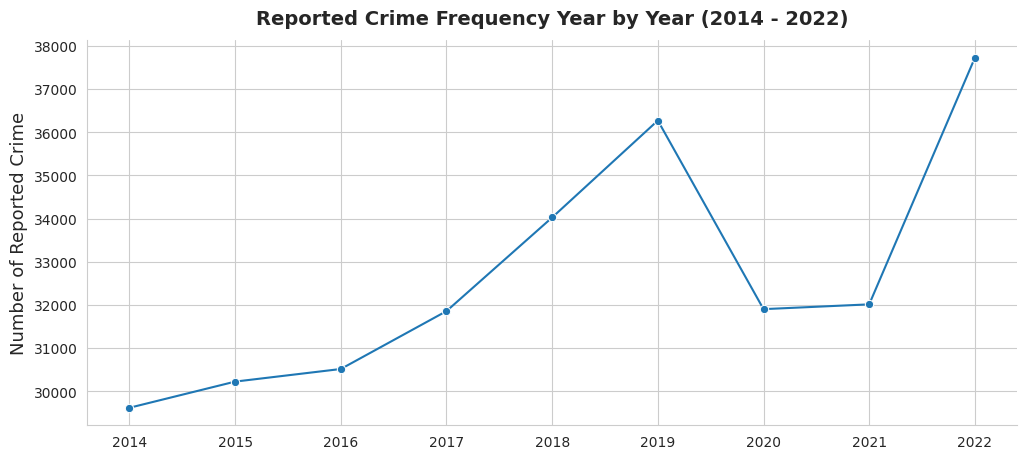

In [15]:
crime_trend_year=data.groupby('REPORT_YEAR').agg({'OFFENCE':'count'}).reset_index()
# crime_trend_year
plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
sns.lineplot(data=crime_trend_year,x='REPORT_YEAR',y='OFFENCE',marker='o')
sns.despine()
plt.xlabel('')
plt.ylabel('Number of Reported Crime',fontsize=13)
plt.title('Reported Crime Frequency Year by Year (2014 - 2022)',y=1.02,fontsize=14,weight='bold')
plt.savefig('crime_trend_timeline.png',bbox_inches = 'tight')
plt.show()

In [16]:
import plotly.express as px
crime_trend = data[['REPORT_DATE','REPORT_MONTH','OFFENCE']]
crime_trend['REPORT_DATE'] = pd.to_datetime(crime_trend['REPORT_DATE']).dt.date
crime_trend = crime_trend.groupby('REPORT_DATE').agg({'OFFENCE':'count'}).reset_index()
# crime_trend

# Create a line plot using Plotly
fig = px.line(crime_trend, x='REPORT_DATE', y='OFFENCE', title='Reported Crime Fquency Month by Month (2014 - 2022)')

# Customize the plot layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Offences',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=True),
)

# Show the plot
fig.show()


### Key Findings:

1. **Rising Trend (2016-2019):** There is a notable upward trend in the number of reported offenses from 2016 to 2019.

2. **Decrease and Stabilization (2019-2021):** Subsequently, there was a significant decline in reported crimes in 2020 and 2021. However, it's worth noting that the crime rate remained higher than the levels observed between 2014 and 2017.

3. **Resurgence (2021-2022):** The trend reversed once again from 2021 to 2022, with a sharp increase in the number of reported offenses.

4. **Historical Comparison:** Over the period of 2014 to 2022, the highest number of reported offenses was recorded in 2022, while the lowest was observed in 2014.

**What is the Frequency of different types of crime in Each Year?**

In [17]:
# finding the no of offences that were reported from 2014 - 2022 across different offence category
crime_year=pd.crosstab(data['REPORT_YEAR'],data['MCI_CATEGORY'])
crime_year

MCI_CATEGORY,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
REPORT_YEAR,,,,,
2014,14957,3423,7148,3101,991
2015,16279,3086,6857,2970,1034
2016,17026,3041,6343,3080,1028
2017,17226,3278,6827,3361,1166
2018,17855,4270,7516,3158,1228
2019,18765,4736,8387,3019,1365
2020,16392,5098,6853,2353,1208
2021,17495,5906,5617,1944,1053
2022,19277,8646,5993,2363,1446


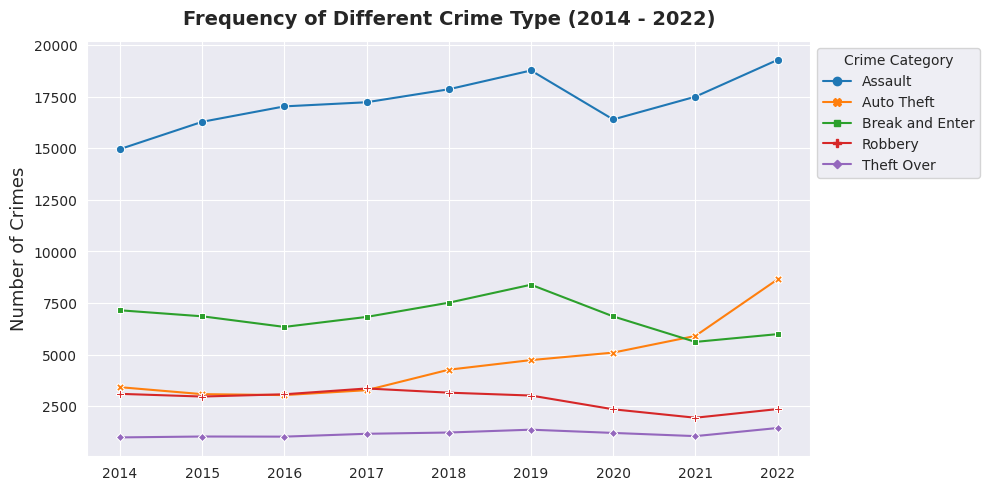

In [18]:
# Create a line plot using Seaborn
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")  
fig=sns.lineplot(data=crime_year, markers=True, palette='tab10',dashes=False)
plt.title('Frequency of Different Crime Type (2014 - 2022)',y=1.02,fontsize=14,fontweight='bold')
plt.xlabel('')
plt.ylabel('Number of Crimes',fontsize=13)
plt.legend(title='Crime Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig('crime_trend.png',bbox_inches = 'tight')
plt.show()

**Key Findings:**

1. **Assault Remains Consistent Leader:**
   - Assault has consistently held the top position as the most commonly reported crime between 2014 and 2022.

2. **Shift in Second Place:**
   - Between 2014 and 2020, Break and Enter ranked as the second most frequently reported crime. However, in 2021 and 2022, Auto Theft surpassed Break and Enter in frequency, indicating a notable shift in crime patterns.

3. **Break and Enter's Rising Trend and Subsequent Decline:**
   - Starting in 2016 and continuing until 2019, Break and Enter exhibited a steady increase in reported cases. However, after 2019, both Break and Enter and Robbery have been on a consistent decline. In contrast, Auto Theft has shown a rapid increase during this period and now ranks as the second most frequently reported crime.

**Do Crime occour equally In Each Premises?**

In [19]:
# finding the number of offences reported in each premises from 2014 - 2022
crime_premise=data.groupby('PREMISES_TYPE').agg({'OFFENCE':'count'}).reset_index()
crime_premise

,PREMISES_TYPE,OFFENCE
0,Apartment,72089
1,Commercial,58746
2,Educational,7291
3,House,54391
4,Other,17185
5,Outside,76067
6,Transit,8396


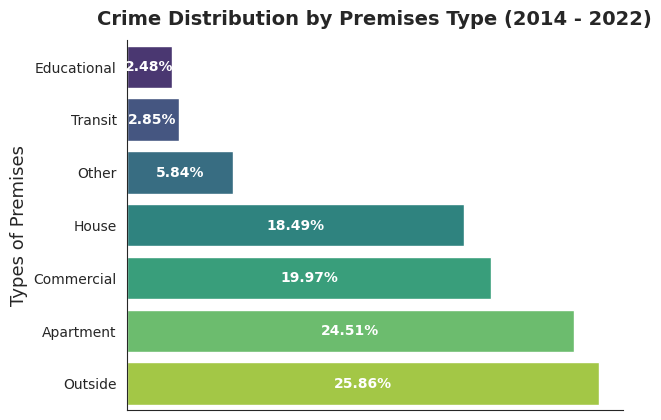

In [20]:
sns.set_style('white')
# Calculate the percentages
crime_premise['Percentage'] = ((crime_premise['OFFENCE'] / crime_premise['OFFENCE'].sum()) * 100)

# Sort the DataFrame by 'Percentage' in ascending order
crime_premise = crime_premise.sort_values(by='Percentage')

# Set the style
# sns.set_style('darkgrid')

# Create a bar plot
ax = sns.barplot(data=crime_premise, y='PREMISES_TYPE', x='Percentage', palette='viridis')

# Annotate the bars with their percentages
for p in ax.patches:
    percentage = p.get_width()
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=10, color='white',weight='bold')  # Adjust color and position

# Set the x-axis label
plt.xlabel('')
plt.xticks([])

# Set the y-axis label
plt.ylabel('Types of Premises',fontsize=13)

plt.title('Crime Distribution by Premises Type (2014 - 2022)',y=1.02,fontsize=14,fontweight='bold')
sns.despine()
# Show the plot
plt.savefig('crime_premises.png',bbox_inches = 'tight')
plt.show()


**Key Findings:**

1. **Outdoor Dominance** (25.86%):
   - Outdoor areas, such as streets, roads, highways, and parking lots, were the most common settings for criminal incidents.

2. **Apartment Incidents** (24.51%):
   - Apartments, including rooming houses and condos, ranked second, with 24.51% of reported offenses.

3. **Commercial Complexities** (19.57%):
   - Commercial dwelling units (hotels, motels, B & Bs), corporate establishments, and convenience stores constituted the third most frequent premises for crimes.

4. **Household Concerns** (18.49%):
   - Houses accounted for 18.49% of reported crimes, placing them as the fourth most common setting.

5. **Transit Troubles** (2.85%):
   - Transit locations, such as TTC subway stations, Go Train stations, and Go stations, witnessed 2.85% of criminal incidents.

6. **Mysterious "Other" Premises** (5.84%):
   - Hospitals, institutions, medical facilities, retirement homes, pharmacies, homeless shelters etc collectively saw 5.84% of reported crimes.

7. **Educational Exception** (2.48%):
   - Educational institutions, including schools, universities, and colleges, reported the lowest number of crimes, accounting for only 2.48% of incidents.

**Do crime occour equally at Different Parts of the Day?:**

In [21]:
result = pd.crosstab(data['REPORT_YEAR'], data['day_parts'], values=data['MCI_CATEGORY'], aggfunc='count')
result = result.reset_index()
result = result.rename_axis(None, axis=1)
# result.describe().T
result

,REPORT_YEAR,Afternoon,Evening,Morning,Night
0,2014,7163,6192,5367,10898
1,2015,7078,6153,5532,11463
2,2016,7071,6402,5335,11710
3,2017,7605,6649,5414,12190
4,2018,8020,7056,5836,13115
5,2019,8246,7272,6491,14263
6,2020,7128,7110,5194,12472
7,2021,7275,6982,5127,12631
8,2022,8235,7821,6152,15517


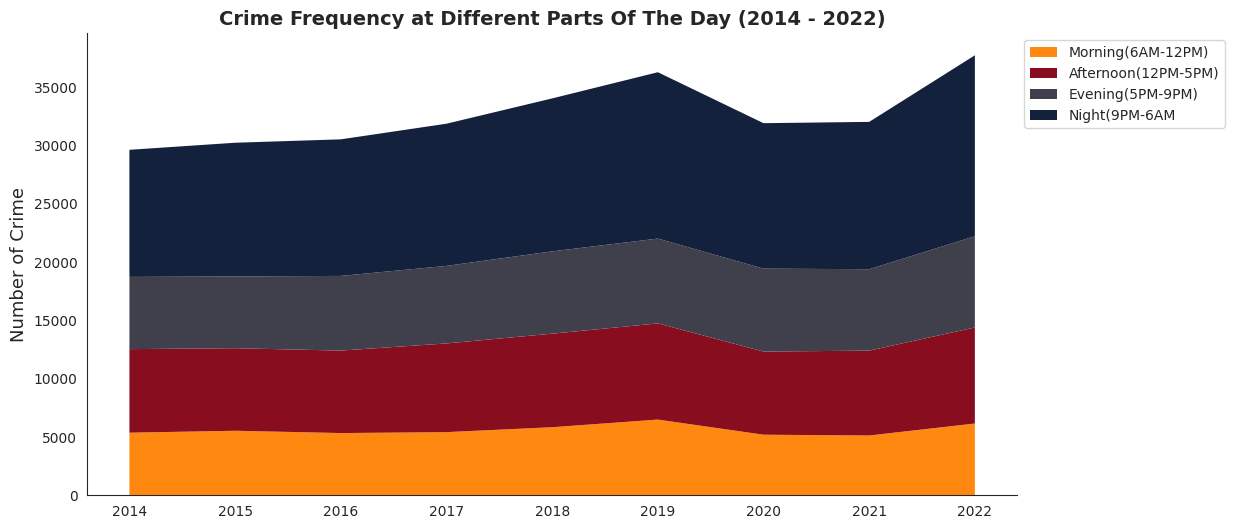

In [22]:
sns.set_style('white')
plt.figure(figsize=(12,6))
# defining the colors for each parts of the day
color=['#ff8811','#880d1e','#403f4c','#14213d']

# making the stackplot
plt.stackplot(result['REPORT_YEAR'],
              result['Morning'],
              result['Afternoon'],
              result['Evening'],
              result['Night'],
              edgecolor='none',
              colors=color
             )

label=['Morning(6AM-12PM)','Afternoon(12PM-5PM)','Evening(5PM-9PM)','Night(9PM-6AM']
plt.legend(labels=label,loc='upper left',bbox_to_anchor=(1,1))
plt.ylabel('Number of Crime',fontsize=13)
plt.title('Crime Frequency at Different Parts Of The Day (2014 - 2022)',fontsize=14,weight='bold')
sns.despine()
plt.savefig('crime_day_part.png',bbox_inches = 'tight')
plt.show()

**Key Findings:**

1. **Nighttime Dominance (9:00 PM - 6:00 AM):**
   - Criminal incidents exhibited a clear preference for nighttime occurrences, with the hours from 9:00 PM to 6:00 AM recording the highest frequency.

2. **Afternoon Activity (12:00 PM - 5:00 PM):**
   - The second most frequently observed time frame for criminal activities was during the afternoon, spanning from 12:00 PM to 5:00 PM.

3. **Evening Engagement (5:00 PM - 9:00 PM):**
   - Subsequently, the evening hours, ranging from 5:00 PM to 9:00 PM, emerged as the third most prevalent temporal window for reported criminal incidents.

4. **Morning Movement (6:00 AM - 12:00 PM):**
   - Morning hours, starting at 6:00 AM and extending until 12:00 PM, represented the fourth most common time segment for the reporting of criminal events.

**At which time of the Day Crime Frequency is high and low?**

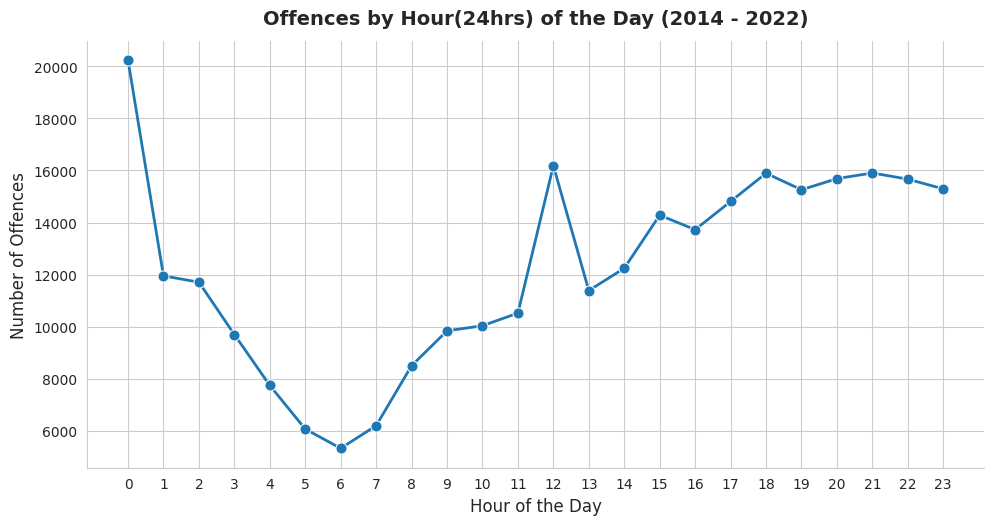

In [23]:
# count offence by each hour
offence_hour=data.groupby('OCC_HOUR')['OFFENCE'].count().reset_index()

# Set the style
sns.set_style('whitegrid')

# Create a line plot with custom style
sns.relplot(data=offence_hour, kind='line',x='OCC_HOUR',y='OFFENCE', aspect=2, marker='o', 
            linewidth=2, markersize=8)

# Set the x-ticks to represent each hour of the day (0 to 23)
plt.xticks(np.arange(0,24,1))

# Set the x-axis label
plt.xlabel('Hour of the Day',fontsize=12)
plt.ylabel('Number of Offences',fontsize=12)

# Set the title
plt.title('Offences by Hour(24hrs) of the Day (2014 - 2022)',y=1.02,fontsize=14,fontweight='bold')

# Show the plot
plt.savefig('crime_24hours.png',bbox_inches = 'tight')
plt.show()

**Key Findings:**

1. **Alignment with Trends:**
   - The observations from the stack area plot closely mirror the trends depicted in the line chart above, providing consistency in the analysis.

2. **Peak Evening Crime (6:00 PM - 12:00 AM):**
   - The hours spanning from 6:00 PM to 12:00 AM stand out with the highest frequency of reported criminal incidents, establishing this time frame as the period with the most substantial occurrence of crimes.

3. **Early Morning Dip (2:00 AM - 6:00 AM):**
   - Between 2:00 AM and 6:00 AM, a noticeable decline in reported crimes is evident, indicating a distinct decrease during these early morning hours.

4. **Morning and Afternoon Peaks:**
   - Following the early morning hours, there is a sharp increase in reported criminal activities from 6:00 AM to 12:00 PM. Another pronounced upswing in incidents occurs from 1:00 PM to 6:00 PM. These trends reveal distinct patterns of crime incidence during different times of the day.

**Does crime occour consistently every week in a month or does some week experience high crime than other?**

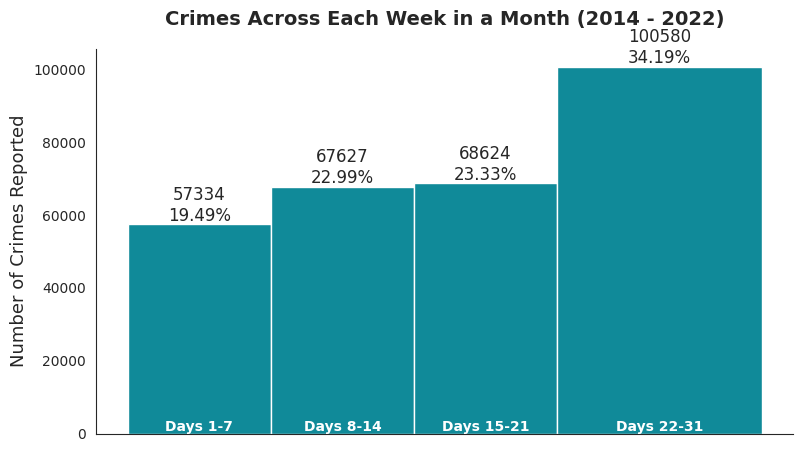

In [24]:
# Define custom bin edges (intervals) for 4 bins
bin_edges = [0, 7, 14, 21, 31]  # Adjusted for 4 bins

sns.set_style('white')
plt.figure(figsize=(9, 5))
hist_data, _, _ = plt.hist(data['REPORT_DAY'], bins=bin_edges, color='#108A99')

total_crimes = len(data)  # Total number of crimes in the dataset

# Annotate each bar with its label (centered) and percentage
for i in range(len(hist_data)):
    x = (bin_edges[i] + bin_edges[i + 1]) / 2  # Calculate the center of the bar
    percentage = (hist_data[i] / total_crimes) * 100  # Calculate percentage
    plt.text(x, hist_data[i], f'{int(hist_data[i])}\n{percentage:.2f}%', ha='center', va='bottom', fontsize=12)

    # Add interval labels below each bin's center
    plt.text(x, -5, f'Days {bin_edges[i] + 1}-{bin_edges[i + 1]}', ha='center', va='bottom',
             fontsize=10, color='white', weight='bold')

# Set labels and title
plt.xticks([])  # Remove x-axis ticks
plt.xlabel('')
plt.ylabel('Number of Crimes Reported', fontsize=13)
plt.title('Crimes Across Each Week in a Month (2014 - 2022)', y=1.04, fontsize=14, weight='bold')

# Show the plot
sns.despine()
plt.savefig('crime_weeks.png', bbox_inches='tight')
plt.show()


**Key Findings:**

1. **Week Four Dominance (34.20%):**
   - A substantial majority of criminal incidents, amounting to 34.20%, were reported during the fourth week of the month, indicating a peak in crime during this period.

2. **Week One Lull (19.49%):**
   - Conversely, the first week experienced the lowest occurrence of crimes, representing only 19.49% of the total. This week stands out as having the fewest reported incidents.

3. **Consistent Weeks (Weeks Three and Four - Approximately 23% each):**
   - Weeks three and four demonstrated a relatively consistent number of criminal incidents, with approximately 23% of cases reported during each of these weeks. This suggests a stable level of crime during this timeframe.

**Does Crime occur equally in each day of the week or is there high crime on weekends?**

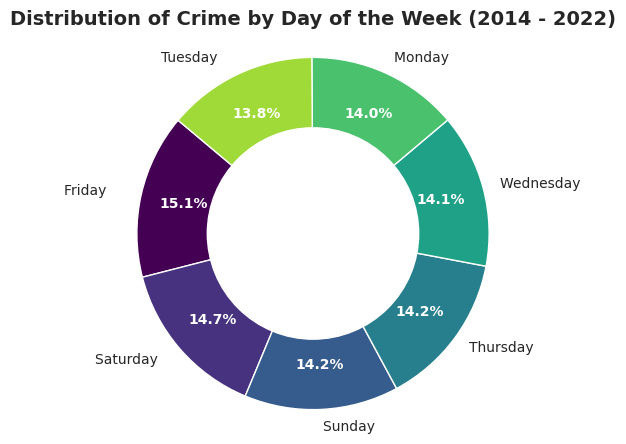

In [25]:
crime_DOW=data.groupby('OCC_DOW')['OFFENCE'].count().reset_index()
# crime_DOW

# Calculate percentages
crime_DOW['Percentage'] = (crime_DOW['OFFENCE'] / crime_DOW['OFFENCE'].sum()) * 100

# Sort the DataFrame by percentage in descending order
crime_DOW = crime_DOW.sort_values(by='Percentage', ascending=False).head(10)

# Create a Viridis colormap
cmap = plt.get_cmap('viridis')

# Create a pie chart with gradient colors based on the percentage
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(
    crime_DOW['Percentage'],
    labels=crime_DOW['OCC_DOW'],
    autopct='%1.1f%%',
    startangle=140,
    colors=[cmap(i / len(crime_DOW)) for i in range(len(crime_DOW))],
    pctdistance=0.75,
)

# Draw a white circle at the center to create a donut-like chart
center_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Set percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    
# Set title
plt.title('Distribution of Crime by Day of the Week (2014 - 2022)',y=1.02,fontsize=14,weight='bold')

# Show the donut chart
plt.savefig('crime_days.png',bbox_inches = 'tight')
plt.show()

**Key Findings:**

1. **Uniform Weekly Frequency:**
   - The frequency of reported crimes remains consistently uniform throughout the week, with no notable variations among the days.

2. **Absence of Day-Specific Trends:**
   - There is no discernible trend indicating a specific day of the week as the primary day for the occurrence of most criminal incidents. This signifies the absence of day-specific patterns in crime occurrence.

**Do Some Crime occur more frequently in some season? Does season affect the nature and frequency of crime?**

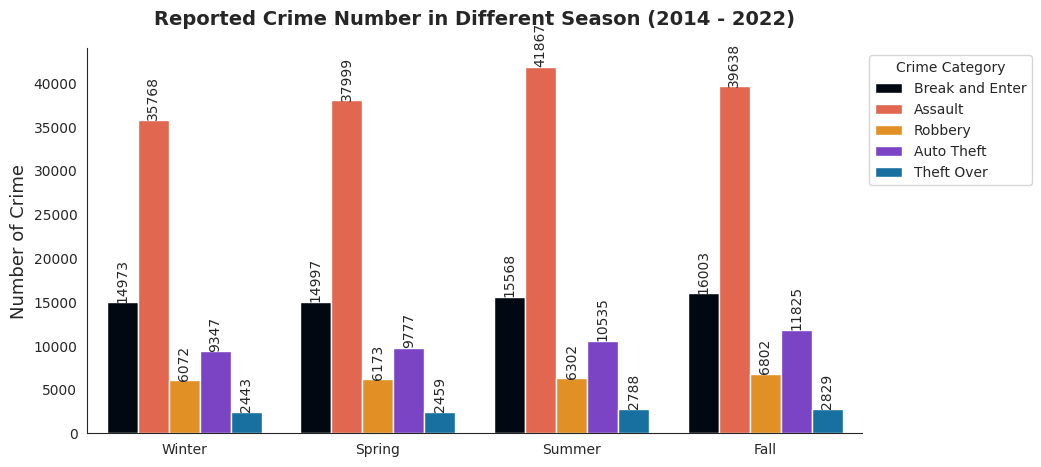

In [26]:
# Set the style
sns.set_style('white')

# Create a figure with a specific figsize
fig, ax = plt.subplots(figsize=(10, 5))  # Adjust the width and height as needed

# Define custom colors for each 'MCI_CATEGORY'
custom_colors = {'Break and Enter': '#000814', 'Assault': '#f95738', 'Robbery': '#ff9505',
                 'Auto Theft': '#772fda','Theft Over':'#0077b6'}

# Create the countplot with custom colors and specify the 'ax' parameter
sns.countplot(data=data, x='season', hue='MCI_CATEGORY', palette=custom_colors, ax=ax)

# Add text labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', rotation=90, fontsize=10)

# Add legend
plt.legend(title='Crime Category', loc='upper left', bbox_to_anchor=(1, 1))

# Set figure title and labels
plt.title('Reported Crime Number in Different Season (2014 - 2022)', y=1.04, fontsize=14, weight='bold')
plt.xlabel('')
plt.ylabel('Number of Crime',fontsize=13)
sns.despine()

# Show the plot
plt.savefig('crime_season.png',bbox_inches = 'tight')
plt.show()


**Key Findings:**

1. **Assault Dominance in All Seasons:**
   - Assault consistently emerges as the most prevalent crime throughout all seasons. Its occurrence shows a slight increase during the summer months and a minor decrease during the winter season.

2. **Robbery and Theft Over: Steady Throughout Seasons:**
   - Robbery and Theft Over consistently rank as the least frequent crimes across all seasons, with their frequencies remaining relatively stable throughout the year.

3. **Break and Enter as a Steady Second:**
   - Break and Enter stands as the second most common crime, maintaining a consistent frequency across all seasons except for the fall, where it experiences a slight increase.

4. **Auto Theft Peaks in the Fall:**
   - Auto theft exhibits a modest rise during the summer season and reaches its peak during the fall, marking the highest frequency among the seasons.

### High Crime Frequency Area(Top 50): 


**Sample of top (50) areas where maximum crime has occured.**

In [27]:
high_crime_area=data.groupby('NEIGHBOURHOOD_158')['OFFENCE'].count().sort_values(ascending=False)
high_crime_area = high_crime_area.reset_index()
high_crime_area.sample(5)

,NEIGHBOURHOOD_158,OFFENCE
142,Runnymede-Bloor West Village,766
12,Oakdale-Beverley Heights,3730
9,Glenfield-Jane Heights,4017
106,Humber Bay Shores,1172
25,Mimico-Queensway,2683


**Finding the duration in days and week between first and last offence in each neighbourhood (Sample):**

In [28]:
data['REPORT_DATE'] = pd.to_datetime(data['REPORT_DATE'])

# Group by 'NEIGHBOURHOOD_158' and calculate the minimum and maximum dates
crime_duration = data.groupby('NEIGHBOURHOOD_158')['REPORT_DATE'].agg(['min', 'max']).reset_index()

#  Convert 'min' and 'max' to datetime objects
crime_duration['min'] = pd.to_datetime(crime_duration['min'])
crime_duration['max'] = pd.to_datetime(crime_duration['max'])

# Calculate the difference in days between 'max' and 'min'
crime_duration['duration_days'] = (crime_duration['max'] - crime_duration['min']).dt.days

# Calculate the duration in weeks
crime_duration['duration_weeks'] = crime_duration['duration_days'] // 7
crime_duration.sample(5)

,NEIGHBOURHOOD_158,min,max,duration_days,duration_weeks
138,West Hill,2014-01-01 05:00:00+00:00,2022-12-31 05:00:00+00:00,3286,469
79,Lansing-Westgate,2014-01-13 05:00:00+00:00,2022-12-31 05:00:00+00:00,3274,467
150,Woodbine-Lumsden,2014-01-02 05:00:00+00:00,2022-12-23 05:00:00+00:00,3277,468
109,Parkwoods-O'Connor Hills,2014-01-03 05:00:00+00:00,2022-12-30 05:00:00+00:00,3283,469
142,Westminster-Branson,2014-01-03 05:00:00+00:00,2022-12-29 05:00:00+00:00,3282,468


**Joining multiple tables:**

In [29]:
area=data[['NEIGHBOURHOOD_158','LONG_WGS84','LAT_WGS84']]

# Merge 'high_crime_area' with 'area' using a left join
crime_loc = pd.merge(high_crime_area, area, how='inner', on='NEIGHBOURHOOD_158')

# Drop duplicates based on the 'NEIGHBOURHOOD_158' column, keeping only the first occurrence
crime_loc = crime_loc.drop_duplicates(subset='NEIGHBOURHOOD_158', keep='first')

# Now 'merged_df' contains one record for each neighborhood
crime_location = crime_loc.sort_values(by='OFFENCE',ascending=False)
crime_location.sample(5)

,NEIGHBOURHOOD_158,OFFENCE,LONG_WGS84,LAT_WGS84
269649,Elms-Old Rexdale,947,-79.552972,43.718640
248183,Humber Bay Shores,1172,-79.489884,43.612099
119213,Harbourfront-CityPlace,2519,-79.396021,43.640894
89358,Yorkdale-Glen Park,2977,-79.448969,43.717490
219386,Thorncliffe Park,1409,-79.345795,43.703684


In [30]:
crime_loc_dur = crime_location.merge(crime_duration,on = 'NEIGHBOURHOOD_158')
crime_loc_dur = crime_loc_dur.drop_duplicates(subset='NEIGHBOURHOOD_158', keep='first').sort_values(by='OFFENCE',ascending=False)
crime_loc_dur.head()

,NEIGHBOURHOOD_158,OFFENCE,LONG_WGS84,LAT_WGS84,min,max,duration_days,duration_weeks
0,West Humber-Clairville,8046,-79.600737,43.731827,2014-01-03 05:00:00+00:00,2022-12-31 05:00:00+00:00,3284,469
1,Moss Park,7328,-79.372758,43.655602,2014-01-02 05:00:00+00:00,2022-12-31 05:00:00+00:00,3285,469
2,Downtown Yonge East,6259,-79.380311,43.656454,2014-01-02 05:00:00+00:00,2022-12-31 05:00:00+00:00,3285,469
3,Yonge-Bay Corridor,5835,-79.386412,43.658168,2014-01-01 05:00:00+00:00,2022-12-30 05:00:00+00:00,3285,469
4,York University Heights,5747,-79.503349,43.760303,2014-01-01 05:00:00+00:00,2022-12-31 05:00:00+00:00,3286,469


**Finding top(50) locations where maximum crime has taken place:**

In [31]:
import folium

# Create a map centered at a location (e.g., Toronto)
m = folium.Map(location=[43.70, -79.40], zoom_start=11)  # Adjust center and zoom as needed

# Add a title to the map
title = "<h4 style='text-align:center;'>Area Having High Crime Frequency(Top 50)</h4>"
folium.Marker(
    location=[43.71, -79.41],  # Adjust the location for the title as needed
    icon=folium.DivIcon(html=title),
).add_to(m)

# Iterate through the rows of the merged dataframe
for index, row in crime_loc_dur.head(50).iterrows():
    neighborhood = row['NEIGHBOURHOOD_158']
    longitude = row['LONG_WGS84']
    latitude = row['LAT_WGS84']
    offense_count = row['OFFENCE']

    # Customize the marker's transparency and size
    marker = folium.Marker(
        [latitude, longitude],
        tooltip=f'{neighborhood}: {offense_count} offenses',
        icon=folium.Icon(
            icon='star',  # You can choose a different icon if needed
            icon_color='blue',  # Change the marker's color as desired
            icon_size=(0, 0)  # Adjust the marker's size as desired
#             icon_opacity=0.8  # Adjust opacity (0.0 - 1.0) for transparency
        )
    )
    marker.add_to(m)

# Display the map
m.save('crime_map.html')
m


In [32]:
import folium
from folium import plugins

# Create a map centered at a location (e.g., Toronto)
m = folium.Map(location=[43.70, -79.40], zoom_start=11)  # Adjust center and zoom as needed

# Add a title to the map
title = "<h4 style='text-align:center;'>Crime Area Heatmap</h4>"
folium.Marker(
    location=[43.71, -79.41],  # Adjust the location for the title as needed
    icon=folium.DivIcon(html=title),
).add_to(m)

# Create a list of data points for the heatmap
heat_data = []
for index, row in crime_location.iterrows():
    latitude = row['LAT_WGS84']
    longitude = row['LONG_WGS84']
    heat_data.append([latitude, longitude])

# Create a heatmap layer with custom blur radius for transparency control
heatmap = plugins.HeatMap(heat_data, blur=40)  # Adjust the blur value as needed

# Add the heatmap layer to the map
heatmap.add_to(m)

# Display the map
m.save('crime_heatmap.html')
m

**Top 10 locations where crime per week is Highest**

In [33]:
# finding top 10 area where number of crime per week is highest
crime_loc_dur['offence_in_week'] = crime_loc_dur['OFFENCE'] // crime_loc_dur['duration_weeks']
crime_loc_dur[['NEIGHBOURHOOD_158','OFFENCE','offence_in_week']].sort_values('offence_in_week',ascending=False).head(20)

,NEIGHBOURHOOD_158,OFFENCE,offence_in_week
0,West Humber-Clairville,8046,17
1,Moss Park,7328,15
2,Downtown Yonge East,6259,13
3,Yonge-Bay Corridor,5835,12
4,York University Heights,5747,12
5,Wellington Place,5668,12
6,Kensington-Chinatown,5337,11
7,West Hill,4660,9
8,Annex,4389,9
9,Glenfield-Jane Heights,4017,8


In [34]:
crime_loc_dur.offence_in_week.describe()

count    158.000000
mean       3.462025
std        2.793614
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       17.000000
Name: offence_in_week, dtype: float64

**Key Findings:**

1. **Variability in Offenses:**
   - Among the examined neighborhoods, there exists a noticeable range in the number of reported offenses per week, with the highest count reaching 17 and the lowest recording just 1. This range highlights differences in crime incidence across neighborhoods.

2. **High-Incidence Neighborhoods:**
   - Certain neighborhoods, including West Humber-Clairville, Moss Park, Downtown Yonge East, Wellington Place, York University Heights, Yonge-Bay Corridor, and Kensington-Chinatown, consistently exhibit a higher incidence of reported offenses compared to other areas. These neighborhoods are notable for their elevated crime rates.

3. **Consistency in Criminal Activity:**
   - The majority of neighborhoods consistently report a minimum of three offenses per week, demonstrating a consistent level of criminal activity across most locales. This suggests a stable pattern of offenses in these areas.

**Finding the Correlation:**

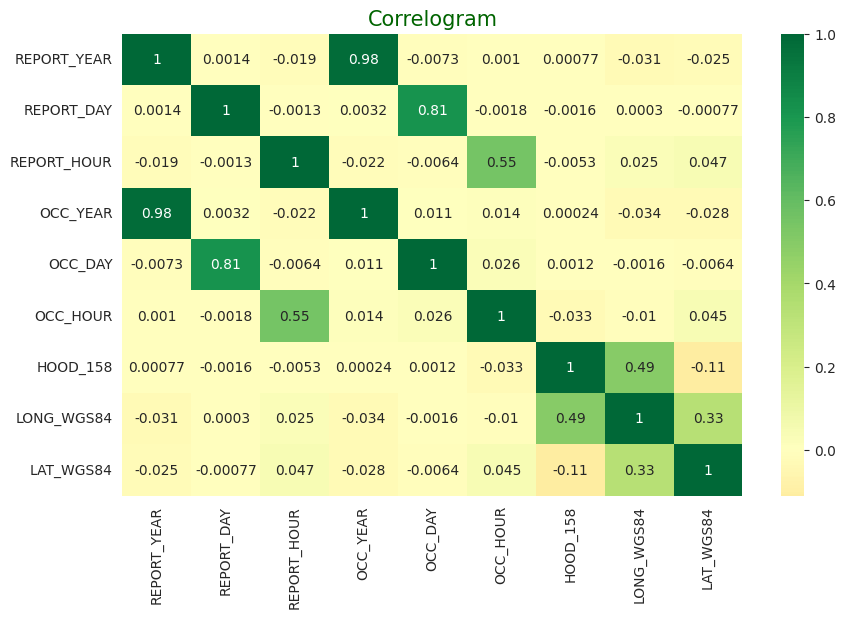

In [35]:
data['REPORT_DATE'] = pd.to_datetime(data['REPORT_DATE'])

# Exclude non-numeric columns from the correlation matrix
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap='RdYlGn', annot=True, center=0)
plt.title('Correlogram', fontsize=15, color='darkgreen')
plt.show()


**You can find more about this dataset on the** [Toronto Police Service](https://data.torontopolice.on.ca/datasets/TorontoPS::major-crime-indicators-open-data/about).

## Summary:

**Unveiling the Toronto's 158 Neighbourhood Crime Landscape: Insights and Trends**

1. **Temporal Insights:**
   - Nighttime (9:00 PM - 6:00 AM) emerges as the prime time for criminal incidents, showcasing a consistent trend.
   - Weekdays appear to hold no significant sway over crime occurrences, with no distinct day-specific patterns.

2. **Seasonal Patterns:**
   - Assault stands as the unwavering leader of reported crimes across all seasons, with a slight spike in summer and a dip in winter.
   - Robbery and Theft Over maintain a stable presence throughout the year.
   - Break and Enter follows Assault closely, except for a notable increase in fall.
   - Auto Theft, showing summer enthusiasm, reaches its peak during the fall season.

3. **Weekly Insights:**
   - Neighborhoods display varying levels of reported offenses, with certain areas consistently reporting higher crime rates.
   - Most locales exhibit a consistent minimum of three offenses per week, showcasing steady criminal activity.

4. **Long-Term Trends:**
   - Assault maintains its dominance as the most frequently reported crime from 2014 to 2022.
   - A shift occurs in the second most reported crime, with Auto Theft surpassing Break and Enter in 2021 and 2022.
   - Break and Enter's steady increase from 2016 to 2019 shifts to a decline, accompanied by Robbery, while Auto Theft experiences rapid growth.